<a href="https://colab.research.google.com/github/Vadiman728/OpenCV-found-face/blob/main/CV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

def blur_face(img):
  (h, w) = img.shape[:2]
  dW = int(w / 3.0)
  dH = int(h / 3.0)
  if dW % 2 == 0:
      dW -= 1
  if dH % 2 == 0:
      dH -= 1
  return cv2.GaussianBlur(img, (dW, dH), 0)



## Постановка задачи

По-моему расположить солнцезащитные очки не такая уж проблема, явно отслеживается аналогия с усами. Ну что ж, начнем. Лично мой любимый актер это Чарли Ханнем. Как он был прекрасен в роли правой руки в Джентльменах, а что он вытворял в Сынах Анархии, а как он разрушал полицию в Вальдо. В общем да, определенно этот человек наш. Возьмем фото с дополнительными объектами, чтобы усложнить жизнь распознованию

Text(0.5, 1.0, 'Ну не душка ли?')

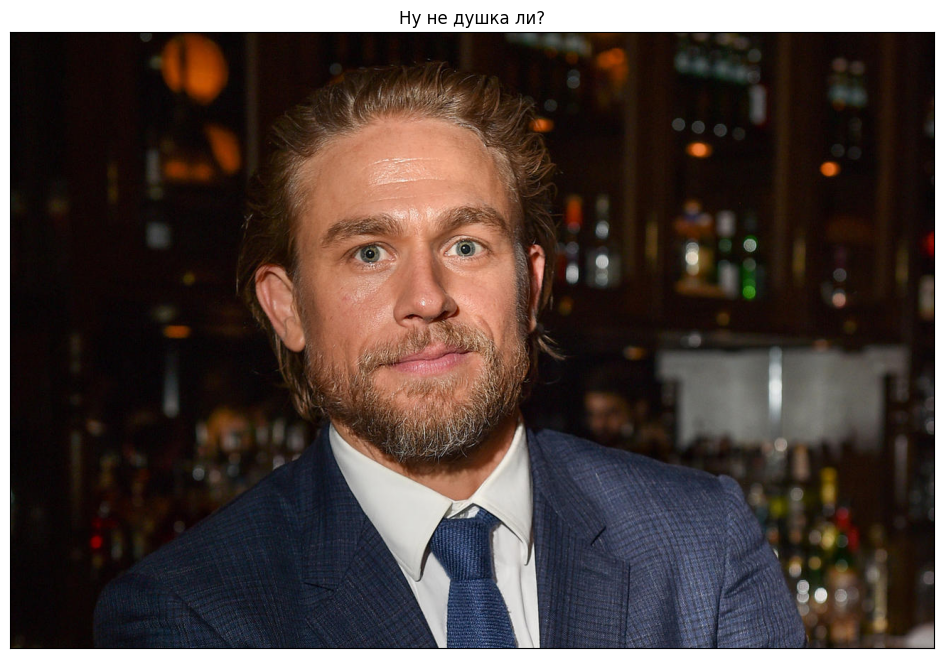

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
gdown.download('https://www.kino-teatr.ru/news/19149/172448.jpg', None, quiet=True)

img = cv2.imread('./172448.jpg')

fig, (ax1) = pyplot.subplots(1,figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Ну не душка ли?')

И инструкция к овалу тоже быстро нашлась

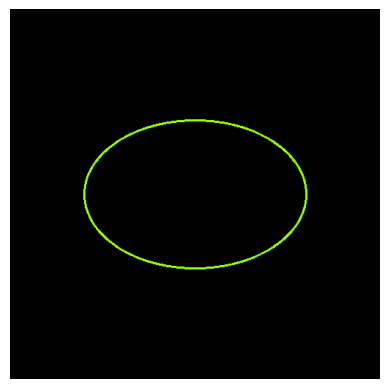

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Создаем изображение-холст
image = np.zeros((500, 500, 3), dtype=np.uint8)  # Создаем черный холст размером 500x500 пикселей

# Указываем параметры овала: центр, полуоси, угол поворота, начальный и конечный угол дуги, цвет и толщину линии
center_coordinates = (250, 250)  # Центр овала
axes_length = (150, 100)  # Полуоси по горизонтали и вертикали
angle = 0  # Угол поворота овала
start_angle = 0  # Начальный угол дуги
end_angle = 360  # Конечный угол дуги
color = (0, 255, 150)  # Цвет овала в формате BGR (синий, зеленый, красный)
thickness = 2  # Толщина линии

# Рисуем овал на изображении
image = cv2.ellipse(image, center_coordinates, axes_length, angle, start_angle, end_angle, color, thickness)

# Конвертируем изображение в RGB для корректного отображения в Jupiter Notebook
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Отображаем изображение с нарисованным овалом
plt.imshow(image_rgb)
plt.axis('off')  # Отключаем оси координат
plt.show()


Осталось лишь привязать полуоси и центр к ширине, длине и центру головы и чуть больше сделать первые два значения, дабы учесть лоб, волосы, шею и тд

## Сначала разберемся с овалом

Все просто- возьмем код с практики и заменим код построения квадрата на код построения овала

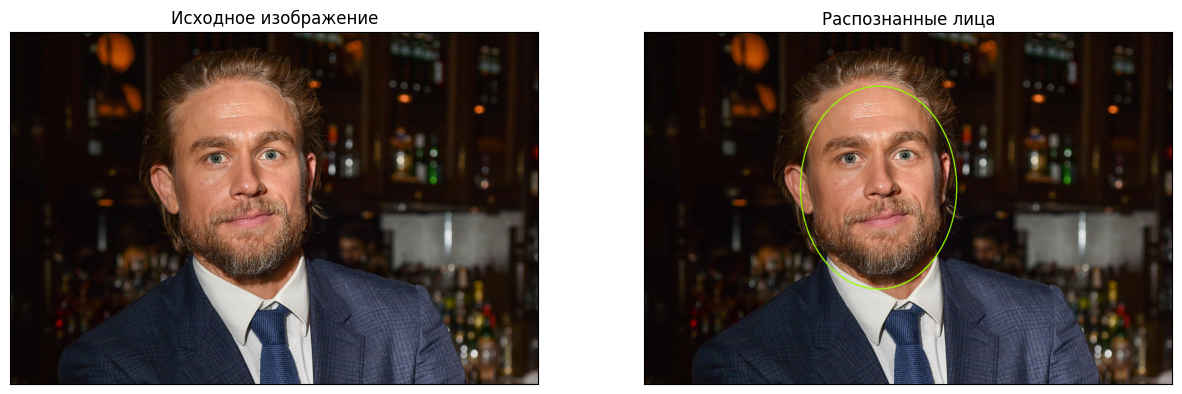

In [ ]:

# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

img2 = img.copy()

# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")


# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # рисование овала
    cv2.ellipse(img2, (int((x2-x)*1.5),int(y2-y)), (width//2, int(height*1.3//2)), angle, start_angle, end_angle, color, thickness)
    # все умножения и коэффиценты подобраны эмпирическим путем

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица')

pyplot.show()

## РИСУЕМ очки

Да, тут я понял, что очки надо нарисовать... это еще проще чем решать проблему с поворотом очков и их позицией. Для очков нужны два круга одинакового радиуса и линия между ними. Линия будет идти от центра до центра, но уменьшенная и смещенная

height = 384


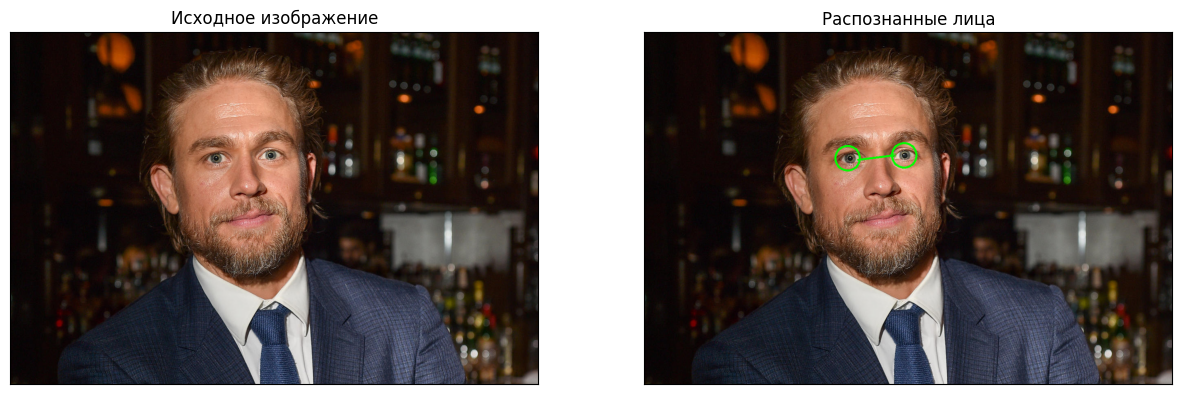

In [ ]:

# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline
img2 = img.copy()

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")


# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")


# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    face = img2[y:y + height, x:x + width] # найденная область с лицом
    # все умножения и коэффиценты подобраны эмпирическим путем
    eyes = classifier_eye.detectMultiScale(face)
    # В процессе рисования замечено, что функция определения глаз может определить сначала левый глаз, потом правый и наоборот
    # Поэтому сделаем проверку. В большом проекте я бы, конечно сделал через нахождение левого и правого глаза, но тут обойдемся чек списком и сравнением
    eye_list = []
    for item in eyes[0]:
      eye_list.append(item)
    check_list = [211, 118, 82, 82]
    if check_list != eye_list:
      new_eyes = []
      new_eyes.extend(eyes[1], eyes[0])
      eyes = new_eyes

    x_eyes = []
    y_eyes = []
    for (x_eye,y_eye,w_eye,h_eye) in eyes:

        # определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        # вычисляем радиус окружности (подобран эмпирическим путем)
        radius = 30
        color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
        thickness = 3 # толщина линии
        # рисуем круг
        cv2.circle(face, center, radius, color, thickness)
        x_eyes.append(x_eye)
        y_eyes.append(y_eye)
    print (f'height = {height}')
    # долго и муторно подбирал все значения, старался сделать универсальное решение
    x_line1 = x_eyes[0] + int(height * 1.11) - int(height* 0.06)
    x_line2 = x_eyes[1] + int(height * 1.11) + int(height* 0.06)
    y_line1 = y_eyes[0]+(width//2)- 5
    y_line2 = y_eyes[1]+(width//2)- 5
    cv2.circle(img2, (x_line1, y_line1),5, (0,255,0))
    cv2.line(img2, (x_line1, y_line1),(x_line2, y_line2), (0, 255, 0),3)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица')

pyplot.show()

очки сделал специально такими маленькими, выражаясь словами известного иноагента "Я так чувствую".

## Блюрим личико кроме глаз

Здесь проще заблюрить лицо, выделить область чистых глаз, эти области добавить к размытому лицу и потом уже это добавить на имг 2

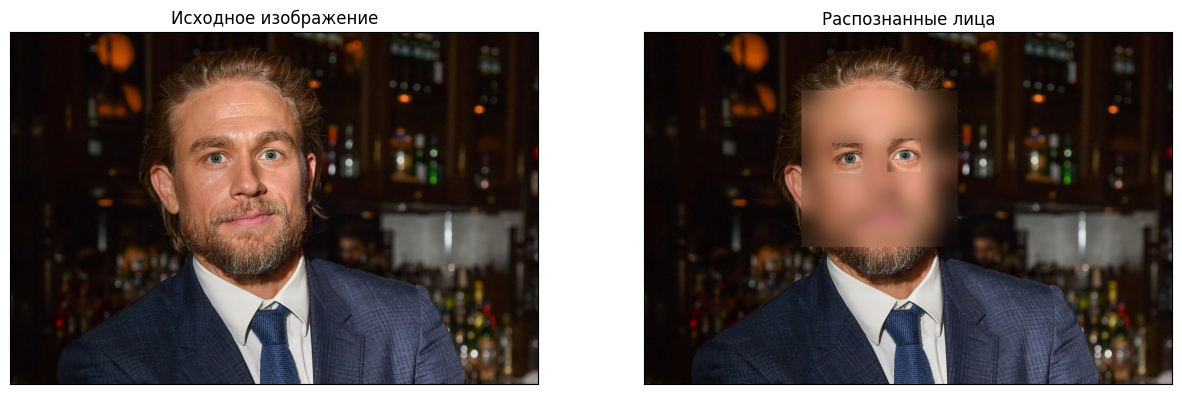

In [ ]:

import cv2
import gdown
from matplotlib import pyplot
gdown.download('https://www.kino-teatr.ru/news/19149/172448.jpg', None, quiet=True)

img = cv2.imread('./172448.jpg')
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline
img2 = img.copy()

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")


# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")


# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
  # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    face = img2[y:y + height, x:x + width]
    # нахождение глаз и получение их координат
    eyes = classifier_eye.detectMultiScale(face)
    eye1_x, eye1_y, eye1_w, eye1_h = eyes[0]
    eye2_x, eye2_y, eye2_w, eye2_h = eyes[1]
    face = img2[y:y + height, x:x + width]
    eyes1_area = face[eye1_y: eye1_y + eye1_h, eye1_x:eye1_x + eye1_w]
    eyes2_area = face[eye2_y: eye2_y + eye2_h, eye2_x:eye2_x + eye2_w]

    b_face = blur_face(face)

    b_face[eye1_y: eye1_y + eye1_h, eye1_x:eye1_x + eye1_w] = eyes1_area
    b_face[eye2_y: eye2_y + eye2_h, eye2_x:eye2_x + eye2_w] = eyes2_area
    img2[y:y + height, x:x + width] = b_face



fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица')

pyplot.show()